# **Project Name**    -

# Uber Supply Demand ap Analysis

##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

I conducted a detailed analysis of Uber cab request data using Excel, MySQL, and Python (Pandas, Seaborn, Matplotlib) to identify operational issues impacting trip completion. The dataset contained 6,745 ride requests with fields such as Request_id, Driver_id, Request_timestamp, Pickup_point, Status, and Duration. I began with data cleaning in Excel and SQL, handling missing values in Drop_timestamp and unassigned drivers (Driver_id = 0). I created calculated fields like Request_Hour, Driver_Assigned, and Duration in minutes to aid analysis.

Using MySQL, I explored patterns in ride requests, cancellations, and supply shortages. Later, I imported the cleaned data into Python for visual exploratory data analysis. I generated multiple EDA charts including trip status distribution, hourly demand trends, pickup point-wise performance, and trip duration by status. Key insights showed that most trip failures occurred during peak hours due to a lack of driver availability, especially for airport pickups. Completed trips had significantly longer durations, while cancelled and failed trips had zero.

Correlation analysis revealed that driver ID and request ID had little influence on trip outcomes, emphasizing the importance of engineered features like time of request and driver assignment. The pairplot confirmed that completed trips follow a predictable duration pattern and are associated with assigned drivers. Overall, the project demonstrated that Uber could significantly reduce cancellations and improve service during peak times by optimizing driver deployment and targeting underserved zones like airports.

This end-to-end project included data cleaning, SQL-based insight generation, and Python-based visualization. It provided actionable business recommendations to reduce failure rates, improve driver assignment, and enhance customer experience, making it highly relevant for operations and data strategy teams.

# **GitHub Link -**

https://github.com/gauri-111/Uber_supply_demand_analysis

# **Problem Statement**


### Uber is facing issues with high cancellations and unassigned ride requests, especially during peak hours. The problem is to analyze request data to identify demand patterns, service gaps, and driver performance issues, with the goal of improving ride availability and customer experience.

#### **Define Your Business Objective?**

### The goal of this project is to analyze Uber ride request data to identify peak demand hours, high cancellation areas, and driver performance issues. The insights will help Uber improve ride availability, reduce unassigned or canceled requests, and optimize driver allocation—ultimately enhancing operational efficiency and customer satisfaction.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [27]:
pip install mysql-connector-python sqlalchemy pandas

### Dataset Loading

In [131]:
import pandas as pd
from sqlalchemy import create_engine

# Define connection parameters
host = 'localhost'            # or your host
port = 3306                   # default MySQL port
user = 'root'                 # your MySQL username
password = 'root'   # your MySQL password
database = 'uber'   # name of your database

# Create connection string
connection_str = f"mysql+mysqlconnector://{user}:{password}@{host}:{port}/{database}"

# Create engine
engine = create_engine(connection_str)

# Write your SQL query
query = "SELECT * FROM uber_requests"

# Fetch data into DataFrame
df = pd.read_sql(query, engine)
import numpy as np
df['Driver_id']=df['Driver_id'].replace(0,np.nan).astype('Int64')

### Dataset First View

In [133]:
df.head()

,Request_id,Pickup_point,Driver_id,Driver_Assigned,Status,Request_timestamp,Hours,Drop_timestamp,Duration,Day_of_Week,Cateory
0,619,Airport,1,Assigned,Trip Completed,2016-07-11 11:51:00,0 days 11:51:00,2016-07-11 13:00:00,68,Monday,Long
1,867,Airport,1,Assigned,Trip Completed,2016-07-11 17:57:00,0 days 17:57:00,2016-07-11 18:47:00,49,Monday,Long
2,1807,City,1,Assigned,Trip Completed,2016-07-12 09:17:00,0 days 09:17:00,2016-07-12 09:58:00,40,Tuesday,Medium
3,2532,Airport,1,Assigned,Trip Completed,2016-07-12 21:08:00,0 days 21:08:00,2016-07-12 22:03:00,54,Tuesday,Long
4,3112,City,1,Assigned,Trip Completed,2016-07-13 08:33:16,0 days 08:33:00,2016-07-13 09:25:47,52,Wednesday,Long


### Dataset Rows & Columns count

In [42]:
row_count=df.shape[0]
print("Row count:" , row_count)

column_count=df.shape[1]
print("Column count:", column_count)

Row count: 6745
Column count: 11


### Dataset Information

In [135]:
print("Dataset Information as follows:")
df.info()

Dataset Information as follows:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   Request_id         6745 non-null   int64          
 1   Pickup_point       6745 non-null   object         
 2   Driver_id          4095 non-null   Int64          
 3   Driver_Assigned    6745 non-null   object         
 4   Status             6745 non-null   object         
 5   Request_timestamp  6745 non-null   datetime64[ns] 
 6   Hours              6745 non-null   timedelta64[ns]
 7   Drop_timestamp     2831 non-null   datetime64[ns] 
 8   Duration           6745 non-null   int64          
 9   Day_of_Week        6745 non-null   object         
 10  Cateory            6745 non-null   object         
dtypes: Int64(1), datetime64[ns](2), int64(2), object(5), timedelta64[ns](1)
memory usage: 586.4+ KB


#### Duplicate Values

In [139]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Request_id, Pickup_point, Driver_id, Driver_Assigned, Status, Request_timestamp, Hours, Drop_timestamp, Duration, Day_of_Week, Cateory]
Index: []


#### Missing Values/Null Values


In [142]:
df.isnull().sum()

Request_id              0
Pickup_point            0
Driver_id            2650
Driver_Assigned         0
Status                  0
Request_timestamp       0
Hours                   0
Drop_timestamp       3914
Duration                0
Day_of_Week             0
Cateory                 0
dtype: int64

In [144]:
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

print("Missing Values Summary:")
print(missing_data)

Missing Values Summary:
Drop_timestamp    3914
Driver_id         2650
dtype: int64


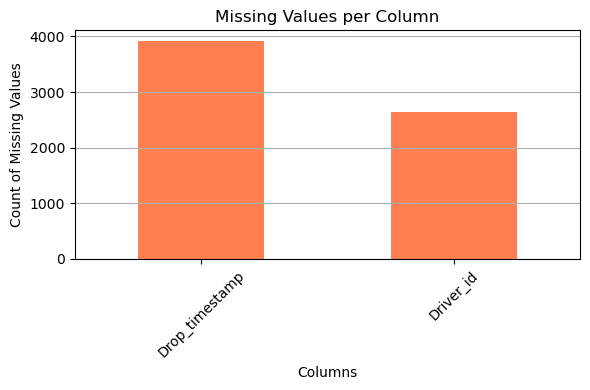

In [146]:
import matplotlib.pyplot as plt

# Plot missing values
missing_data.plot(kind='bar', figsize=(6, 4), color='coral')

plt.title('Missing Values per Column')
plt.ylabel('Count of Missing Values')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# What did you know about your dataset?

The dataset contains information about Uber ride requests made from two main pick-up points. Airport and City, alon with their Status, timestamp, driver assignment, and trip durations. After performin initial data cleaning and exploration, I observed the following key points-: 
The dataset has 6745 rows and contains 11 columns.
There are nno duplicae records in the dataset
But a few columns do have null values; for example, the drop_timestamp column has 3941 null values.


## ***2. Understanding Your Variables***

# Dataset Columns

In [148]:
column_list= df.columns.tolist()
print(column_list)

['Request_id', 'Pickup_point', 'Driver_id', 'Driver_Assigned', 'Status', 'Request_timestamp', 'Hours', 'Drop_timestamp', 'Duration', 'Day_of_Week', 'Cateory']


# Dataset Describe

In [150]:
df.describe()

,Request_id,Driver_id,Request_timestamp,Hours,Drop_timestamp,Duration
count,6745.000000,4095.0,6745,6745,2831,6745.000000
mean,3384.644922,149.501343,2016-07-13 13:43:04.303039232,0 days 13:26:58.612305411,2016-07-13 13:15:33.899328768,21.788881
min,1.000000,1.0,2016-07-11 00:00:00,0 days 00:00:00,2016-07-11 00:51:00,0.000000
25%,1691.000000,75.0,2016-07-12 07:51:00,0 days 07:39:00,2016-07-12 07:42:00,0.000000
50%,3387.000000,149.0,2016-07-13 14:23:37,0 days 13:32:00,2016-07-13 12:14:06,0.000000
75%,5080.000000,224.0,2016-07-14 19:39:27,0 days 19:26:00,2016-07-14 19:13:52,47.000000
max,6766.000000,300.0,2016-07-15 23:59:58,0 days 23:59:00,2016-07-16 01:09:24,82.000000
std,1955.099667,86.051994,NaN,0 days 06:30:12.572705866,NaN,27.148829


### Variables Description

Drop_timestamp is missing for around 58% of the records -> expected for incomplete/cancelled trips.
Mean trip duration is ~22 minutes, but 50% of requests have Duration = 0, again indicating unsuccessful trips.
Max duration is 82 minutes.
Most ride requests happened between 7 AM and 8 PM, peaking around 1 PM (13:00 hours).

### Check Unique Values for each variable.

In [157]:
for col in df.columns:
    print(f"Value counts for column '{col}':")
    print(df[col].value_counts())
    print()

Value counts for column 'Request_id':
Request_id
619     1
1132    1
1161    1
1157    1
1160    1
       ..
9       1
5605    1
5364    1
4316    1
6753    1
Name: count, Length: 6745, dtype: int64

Value counts for column 'Pickup_point':
Pickup_point
City       3507
Airport    3238
Name: count, dtype: int64

Value counts for column 'Driver_id':
Driver_id
27     22
176    21
177    21
84     21
22     21
       ..
208     8
123     7
42      7
265     6
300     6
Name: count, Length: 300, dtype: Int64

Value counts for column 'Driver_Assigned':
Driver_Assigned
Assigned    6745
Name: count, dtype: int64

Value counts for column 'Status':
Status
Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: count, dtype: int64

Value counts for column 'Request_timestamp':
Request_timestamp
2016-07-11 19:02:00    6
2016-07-11 17:57:00    6
2016-07-11 08:37:00    6
2016-07-11 09:40:00    6
2016-07-12 21:42:00    5
                      ..
2016-07-15 18:08:33    1
2016

### What all manipulations have you done and insights you found?

Converted Request_timestamp and Drop_timestamp columns from text to datetime. Extracted: Request_Hour -> to analyze hourly trends. Created new columns Duration(in minutes), Driver_assigned column as a binary flag whether Asigned and Not Assigned. Category column for trip duration as Long, Short and Medium. Day of week column to know the day of week when the ride is requested
# Insights
Trip Status-> Majority of requests are either Cancelled or No Cars Available — very few are successfully completed.
Driver Assignment-> arge number of requests had no driver assigned, especially during peak hours.
Pickup Location-> Airport requests often fail due to "No Cars Available", while City requests face more cancellations.
Duration-> Completed trips usually last 20–30 minutes.
Operational Gap-> Supply-demand mismatch — peak-hour demand is not met with enough drivers, especially at the airport.

# 4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

#### Chart - 1

C:\Users\Admin\AppData\Local\Temp\ipykernel_7884\3700185323.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Status', data=df, palette='Set2')


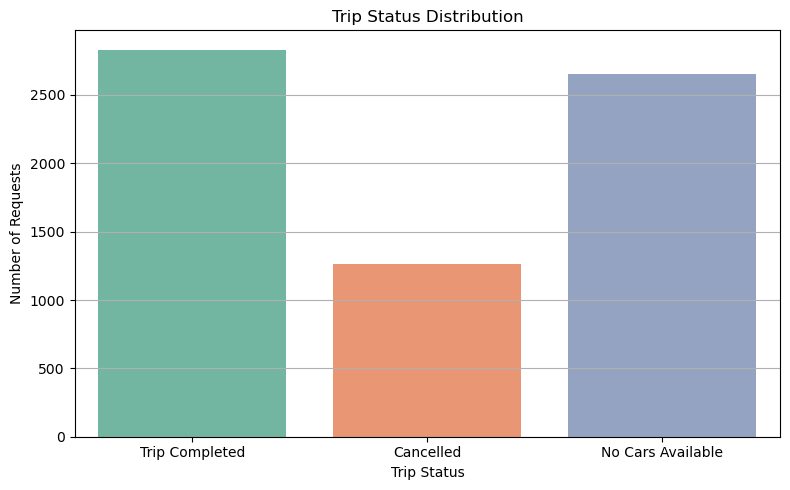

In [165]:
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.countplot(x='Status', data=df, palette='Set2')
plt.title('Trip Status Distribution')
plt.xlabel('Trip Status')
plt.ylabel('Number of Requests')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This countplot was selected because it clearly shows the frequency of each trip status category — Completed, Cancelled, or No Cars Available. It’s ideal for categorical data and helps instantly understand operational performance.

##### 2. What is/are the insight(s) found from the chart?

A large number of requests are not completed. "No Cars Available" and "Cancelled" requests combined make up a significant portion — indicating poor supply or customer dissatisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.
Positive Impact:
Yes, this insight can help the operations team identify weak fulfillment areas and optimize driver deployment — especially during peak hours or at specific pickup points. Improved fulfillment can directly increase customer satisfaction and revenue.
Negative Growth Indication:
If not addressed, it may result in decreased brand trust and lower growth over time. High cancellation and unavailability rates point to a negative customer experience.

#### Chart - 2

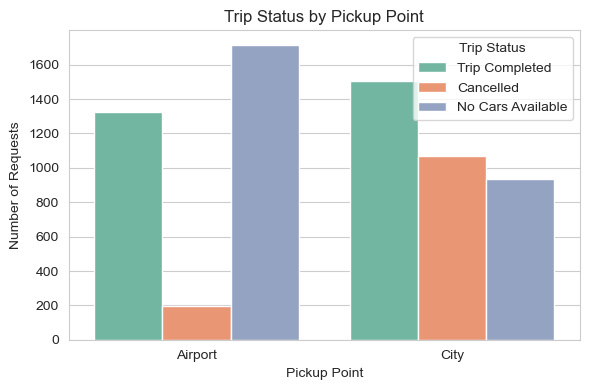

In [213]:
plt.figure(figsize=(6,4))
sns.set_style("whitegrid")
sns.countplot(data=df, x='Pickup_point', hue='Status', palette='Set2')
plt.title('Trip Status by Pickup Point')
plt.xlabel('Pickup Point')
plt.ylabel('Number of Requests')
plt.legend(title='Trip Status')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This grouped bar chart allows us to compare categorical relationships — specifically, how trip statuses vary by pickup location. It’s one of the best visual tools for highlighting comparisons within categories using hue.

##### 2. What is/are the insight(s) found from the chart?

City pickups face more Cancellations. Airport pickups have more instances of No Cars Available. Overall, both locations struggle to complete a high number of requests, but failure reasons differ by location.

##### 3. Will the gained insights help creating a positive business impact?
Positive Impact:
Location-specific insights help Uber target operational fixes:
City: Investigate why customers cancel (delay? pricing? app issue?). 
Airport: Improve driver availability or incentivize airport pickups.
Negative Growth Indication:
Unattended airport demand may lead to frequent lost business from high-value customers (e.g., travelers). High cancellation in cities could suggest frustrated local users, harming repeat usage and brand loyalty.

#### Chart - 3

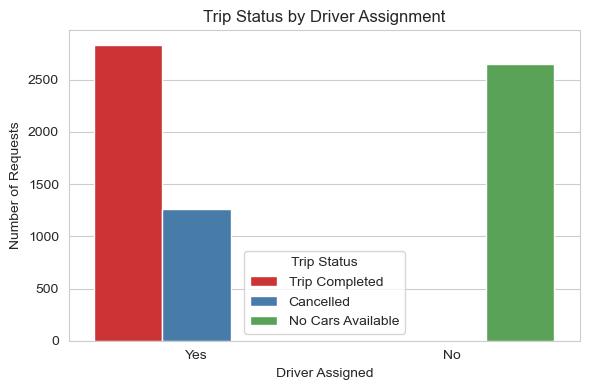

In [215]:
df['Driver_Assigned'] = df['Driver_id'].apply(lambda x: 'Yes' if x > 0 else 'No')

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Driver_Assigned', hue='Status', palette='Set1')

plt.title('Trip Status by Driver Assignment')
plt.xlabel('Driver Assigned')
plt.ylabel('Number of Requests')
plt.legend(title='Trip Status')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A grouped bar chart (with hue) is perfect to show how driver assignment impacts trip outcomes. This helps detect operational issues like high no-car or cancellation rates when no driver is assigned.

##### 2. What is/are the insight(s) found from the chart?

When no driver is assigned, most requests result in "No Cars Available". When a driver is assigned, trips are more likely to be "Completed" or   "Cancelled", rarely "No Cars Available". Driver assignment is a strong predictor of trip success.

##### 3. Will the gained insights help creating a positive business impact?
Positive Impact:
Reinforces that trip completion is highly dependent on driver assignment. Helps Uber prioritize real-time driver matching algorithms and driver incentivization to increase assignment rate. Improves resource allocation during peak hours.
Negative Growth Indication:
High number of requests without assigned drivers leads to lost revenue and customer churn. Continual failure in assigning drivers during peak demand will damage trust and repeat usage.

#### Chart - 4

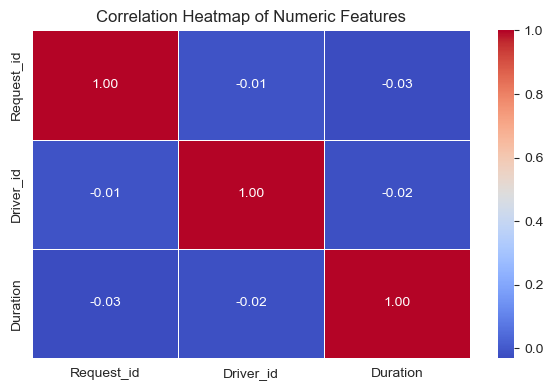

In [218]:
# Compute correlation matrix for numerical columns only
correlation_matrix = df[['Request_id', 'Driver_id', 'Duration']].corr()

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?
A heatmap helps easily identify linear correlations between numeric variables — useful for detecting multicollinearity or strong relationships worth exploring further.

##### 2. What is/are the insight(s) found from the chart?
All variables show very weak or no correlation with each other (all values close to 0). Duration has no significant linear correlation with either Request_id or Driver_id. This suggests that:
Request_id is just an identifier (expected).
Driver_id is not directly predictive of trip duration — possibly due to many 0 values for unassigned drivers.

##### 3. Will the gained insights help creating a positive business impact?¶
Positive Impact: Confirms that none of the raw numeric IDs (like Request_id, Driver_id) carry meaningful predictive power. Encourages proper feature engineering, such as: Converting Driver_id > 0 into a binary driver_assigned flag. Focusing on other features like pickup point, request hour, and status.
Negative Growth Indication: Relying on these numeric columns without transformation may lead to ineffective models or misleading patterns. Misinterpreting IDs as continuous features could introduce noise into downstream analytics or predictions.

#### Chart - 5

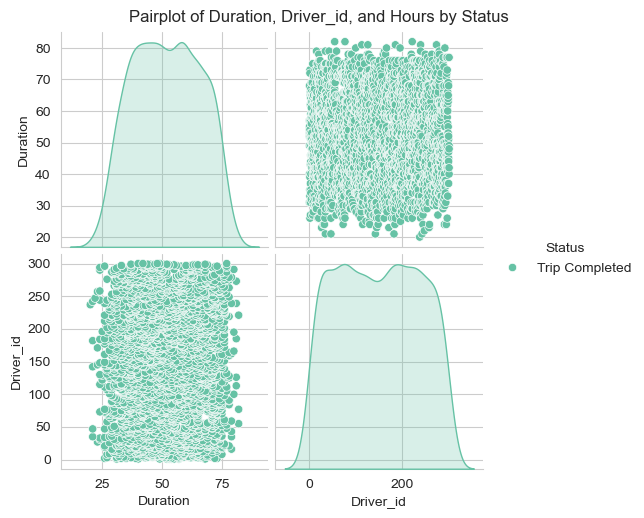

In [206]:
# Filter useful numeric columns and drop zero-duration rows for clarity
pairplot_df = df[['Duration', 'Driver_id', 'Hours', 'Status']].copy()
pairplot_df = pairplot_df[pairplot_df['Duration'] > 0]  # Remove trips that never happened

# Create the pairplot
sns.pairplot(pairplot_df, hue='Status', palette='Set2', diag_kind='kde')
plt.suptitle('Pairplot of Duration, Driver_id, and Hours by Status', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?
A pairplot is perfect for visualizing the distributions and relationships between multiple numeric variables. Here, it is used to explore patterns within completed trips — especially the relationship between: Duration, This helps confirm whether driver assignment influences trip duration and whether any clusters or outliers exist in completed trips.

##### 2. What is/are the insight(s) found from the chart?
Uniform distribution: Driver_id is spread widely — suggests Uber is using all available drivers fairly evenly for completed trips.

Duration values: Most trips last between 25 to 75 minutes, centered around 50 minutes. The distribution is fairly symmetrical.

No strong correlation: The scatter plot shows no direct relationship between Duration and Driver_id, which is expected because these are not inherently related variables.

No outliers: There are no extreme values or unusual groupings, which is good for modeling and general data quality.

##### 3. Will the gained insights help creating a positive business impact?¶
Positive Impact: Confirms that driver assignment is well-balanced — no over-reliance on specific drivers.

The predictable trip duration supports time estimations, pricing strategies, and route optimization.

Clean distribution of durations and driver usage suggests data quality is high, suitable for further modeling.
Negative Growth Indication: Since this chart only shows Completed trips, we can’t analyze what failed — we’re missing a comparison to Cancelled/No Cars Available.

Lack of visible patterns also suggests that for performance improvement, we must look at other influencing factors — like request time, location, or traffic — not just driver or duration.